# 📈 Sales Performance and Trend Analysis Using Python
#### A Data-Driven Exploration of Revenue, Trends, and Pricing Patterns

## 1. Import Required Libraries

In [44]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import csv


## 2. Load the Dataset

In [45]:

df = pd.read_csv(
    r"Car_Sales_Data.csv",
    quoting=csv.QUOTE_MINIMAL,
    quotechar='"',
    on_bad_lines='skip',
    low_memory=False
)


## First 5 rows

In [46]:

# Show first 5 rows 
print(df.head())


    ID        Sales_Person    Customer_Name Car_Make  Car_Model  Car_Year  \
0  1.0  Christopher Murphy   Nicholas Price   Toyota  Silverado    2020.0   
1  2.0        Megan Gibson     Joshua Clark     Ford    Corolla    2016.0   
2  3.0      Erin Sawyer MD  Kelsey Peterson   Nissan    Corolla    2010.0   
3  4.0         Gregory Lee        Ana Jones   Nissan  Silverado    2015.0   
4  5.0      Nancy Hamilton    Sabrina Mason     Ford      F-150    2010.0   

   Sale_Price  Commission_Rate  Commission_Earned    Year      Month  \
0     30345.0         0.127035            3854.87  2022.0     August   
1     48949.0         0.136564            6684.70  2023.0      March   
2     22289.0         0.088097            1963.59  2022.0   December   
3     28857.0         0.148810            4294.21  2022.0       June   
4     46327.0         0.058813            2724.63  2022.0  September   

   Month_ID        Day  Day_ID  Day_Index Unnamed: 15  Unnamed: 16  \
0       8.0  Wednesday     3.0    

## 3. Clean Unnecessary Columns

In [47]:

# Remove unnecessary columns if present
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col], errors='ignore')


 ## Calculate Profit

In [48]:

# Check and calculate Profit if missing
if 'Profit' not in df.columns:
    df['Profit'] = df['Sale_Price'] - df['Commission_Earned']


## Generate Covariance Matrix

In [49]:
# 🧮 Covariance Matrix
covariance_matrix = df[['Sale_Price', 'Commission_Earned', 'Profit']].cov()
print("\n Covariance Matrix:\n", covariance_matrix)



 Covariance Matrix:
                      Sale_Price  Commission_Earned        Profit
Sale_Price         1.344974e+08       1.346147e+07  1.210360e+08
Commission_Earned  1.346147e+07       2.207793e+06  1.125368e+07
Profit             1.210360e+08       1.125368e+07  1.097823e+08


## Display Unique Values


# 🎯 Unique values for reference
print("\nUnique Sales Persons:\n", df['Sales_Person'].unique())
print("\nUnique Car Makes:\n", df['Car_Make'].unique())
print("\nUnique Months:\n", df['Month'].unique())
print("\nUnique Car Models:\n", df['Car_Model'].unique())


## Generate Correlation Matrix

In [51]:

# 📈 Pearson Correlation Matrix
corr_matrix = df[['Sale_Price', 'Commission_Earned', 'Profit']].corr()
print("\n Pearson Correlation Matrix:\n", corr_matrix)


 Pearson Correlation Matrix:
                    Sale_Price  Commission_Earned    Profit
Sale_Price           1.000000           0.781190  0.996073
Commission_Earned    0.781190           1.000000  0.722852
Profit               0.996073           0.722852  1.000000


# 4. Visualization

 ## Plot Correlation Heatmap

In [52]:
# ✅ Plot Styling
sns.set(style="whitegrid", palette="deep", font_scale=1.1)
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.2

 ## 1. Plot Pairwise Relationships

 The correlation heatmap provides a visual summary of the linear relationships between numerical variables. High positive correlations (values near +1) suggest that as one variable increases, the other tends to increase as well. This helps in identifying which metrics are most closely connected, which is crucial for further predictive or business analysis.

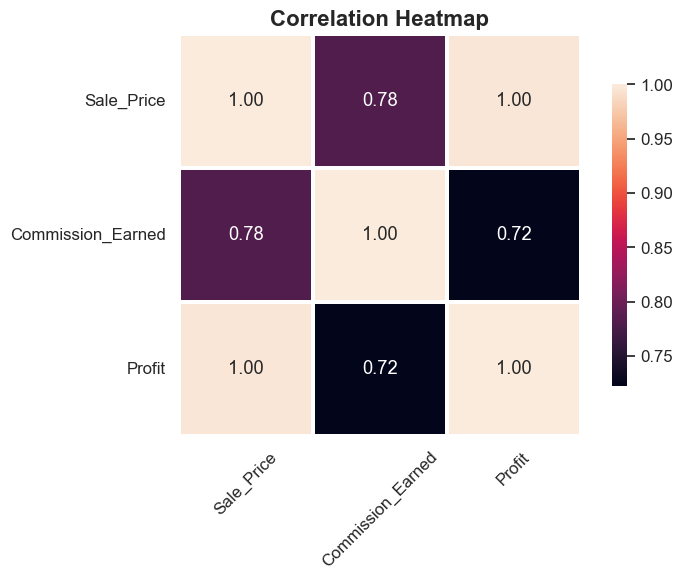

In [53]:
# 🔥 Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="rocket", fmt=".2f", linewidths=1.5, square=True, cbar_kws={"shrink": 0.75})
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

 ## 2. Top 5 Salespeople by Total Sales

 The pairplot reveals scatter plots between each pair of features and kernel density estimates on the diagonal. It allows us to observe patterns, distributions, and possible outliers across features like Sale_Price, Commission_Earned, and Profit. Regression lines help in identifying trends, while KDE plots on the diagonal give an idea of variable distribution.

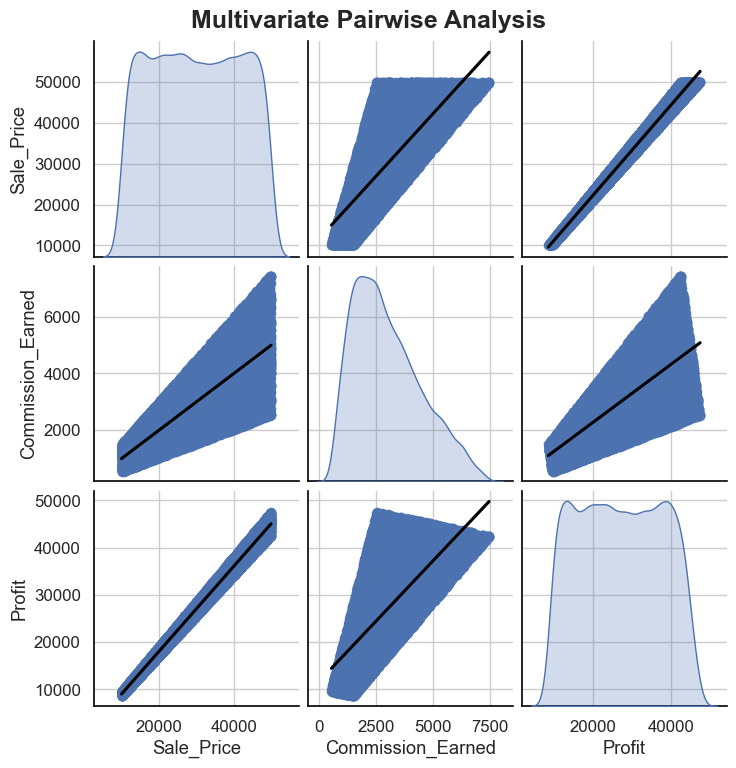

In [54]:
# 🌀 Pairplot for multivariate comparison
sns.pairplot(df[['Sale_Price', 'Commission_Earned', 'Profit']],
             kind="reg",
             diag_kind="kde",
             plot_kws={"line_kws": {'color': 'black'}})

plt.suptitle("Multivariate Pairwise Analysis", y=1.02, fontsize=18, fontweight='bold')
plt.show()



## 3. Top 5 Salespeople by Revenue

This bar chart ranks salespeople by their contribution to total revenue. It not only highlights the top performers but also helps organizations reward productivity and identify potential for mentorship or training programs based on sales success.

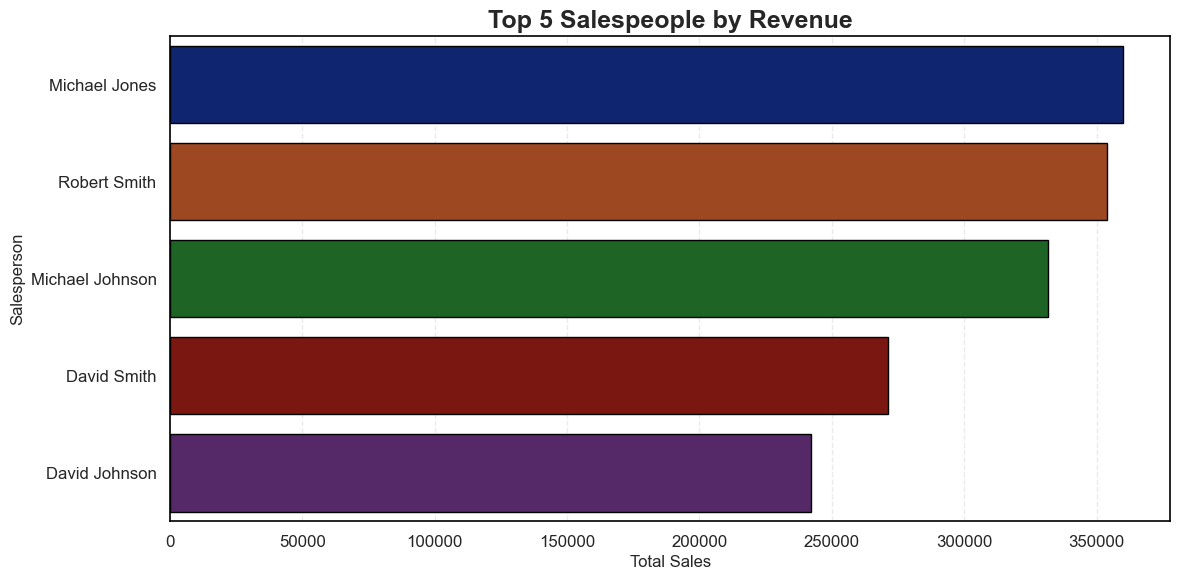

In [55]:


# ✅ Top 5 Salespeople by Revenue

# Group by Sales_Person and calculate total sales
top_5 = (
    df.groupby('Sales_Person')['Sale_Price']
    .sum()
    .reset_index(name='Total_Sales')
    .sort_values(by='Total_Sales', ascending=False)
    .head(5)
)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_5,
    x='Total_Sales',
    y='Sales_Person',
    hue='Sales_Person',         # Assign hue to fix warning
    palette="dark",
    edgecolor='black',
    legend=False                # Disable legend since y-axis already shows names
)
plt.title('Top 5 Salespeople by Revenue', fontsize=18, fontweight='bold')
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Salesperson', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## 4. Monthly Sales Trend by Year

By comparing total sales in each month and breaking them down by year, this bar plot helps reveal seasonal patterns or business cycles. Identifying months with peak sales can guide marketing efforts and inventory planning.

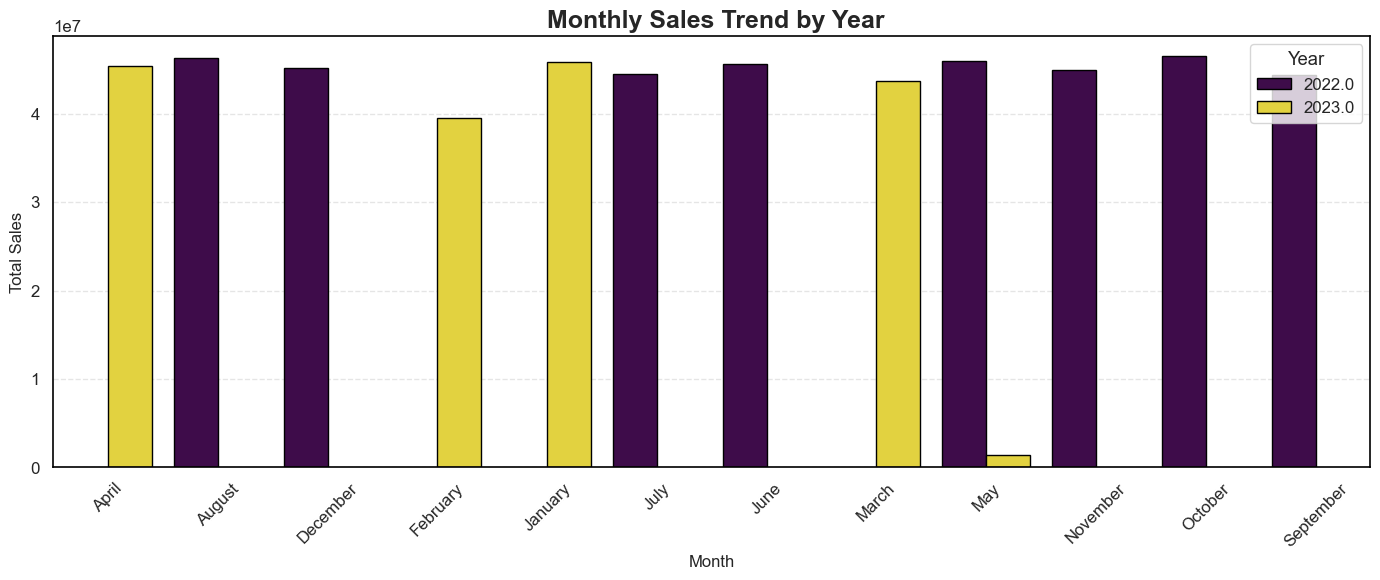

In [56]:

#  Monthly Sales Trend (if Year and Month present)
if 'Year' in df.columns and 'Month' in df.columns:
    monthly_sales = df.groupby(['Month', 'Year'])['Sale_Price'].sum().reset_index()

    plt.figure(figsize=(14, 6))
    sns.barplot(data=monthly_sales, x='Month', y='Sale_Price', hue='Year', palette="viridis", edgecolor='black')
    plt.title(' Monthly Sales Trend by Year', fontsize=18, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()
 

 ## 5. Monthly Sales Distribution by Car Make 

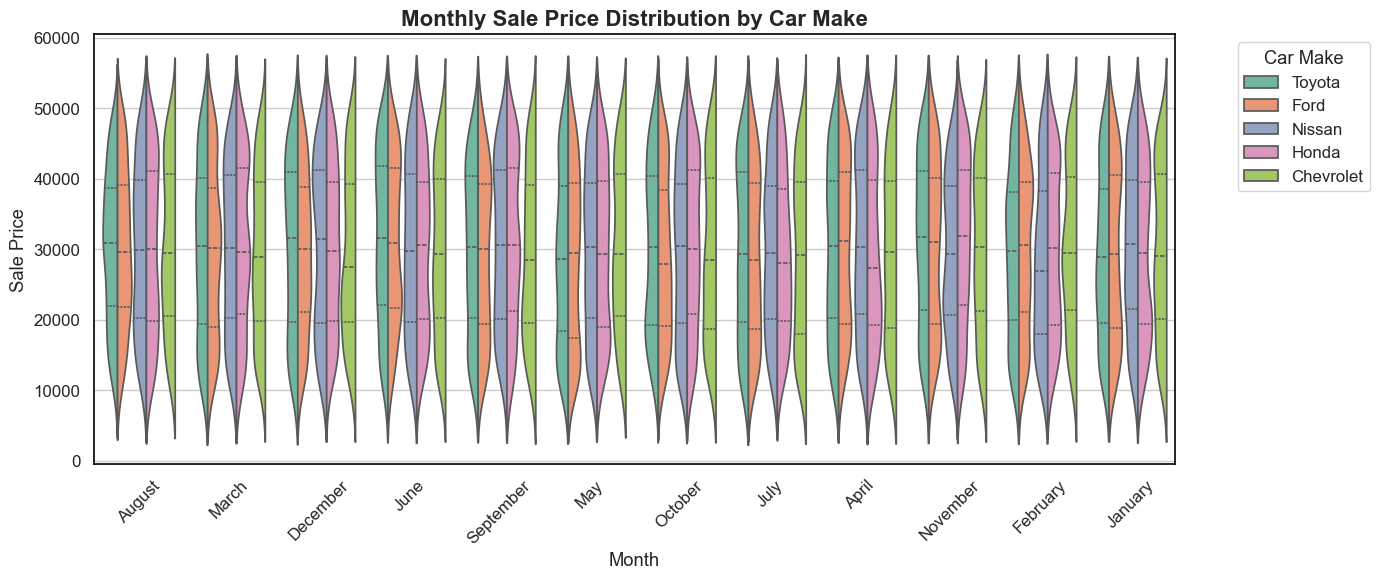

In [57]:
# Objective 6: Monthly Sales Distribution by Car Make (Violin Plot)

plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='Month', y='Sale_Price', hue='Car_Make', split=True, inner='quartile', palette='Set2')
plt.title("Monthly Sale Price Distribution by Car Make", fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.legend(title='Car Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 6. KDE plot for monthly sales by year

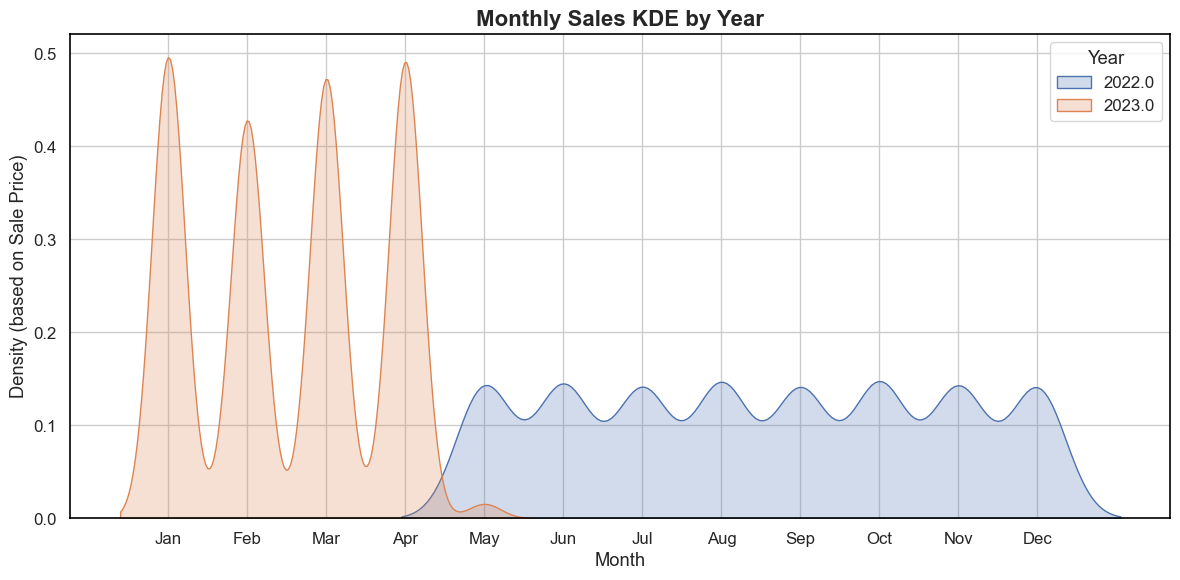

In [58]:
# Convert Month column to numeric if it's in string format
if df['Month'].dtype == 'object':
    df['Month_Num'] = pd.to_datetime(df['Month'], format='%B').dt.month
else:
    df['Month_Num'] = df['Month']

# KDE plot for monthly sales by year
plt.figure(figsize=(12, 6))
for year in sorted(df['Year'].dropna().unique()):
    subset = df[df['Year'] == year]
    sns.kdeplot(
        data=subset,
        x='Month_Num',
        weights='Sale_Price',
        label=str(year),
        fill=True,
        common_norm=False
    )

plt.title("Monthly Sales KDE by Year", fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Density (based on Sale Price)')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()
